In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import random
import math
import numpy as np

In [2]:
# parameters for group effect
g1 = 2
g2 = 2
g3 = 0.5

# model parameters
sigma = 0.5
beta = 1

In [ ]:
def mle(observations):
    # basically want to maximize the product of likelihood and prior
    # let's just do likelihood first lmao
    max_x = [0, 0, 0, 0, 0] # only estimating the means i guess...
    max_likelihood = 0
    ceiling = 10
    for i1 in range(0, ceiling):
        for i2 in range(0, ceiling):
            for i3 in range(0, ceiling):
                for i4 in range(0, ceiling):
                    for i5 in range(0, ceiling):
                        params = [i1, i2, i3, i4, i5]
                        
                        current_val = likelihood_val(params, observations)
                        if current_val > max_likelihood:
                            max_x = params
                            max_likelihood = current_val
    return max_x

def likelihood_val(params, observations):
    product = 1.0
    
    # get softmax denom
    sm_sum = 0.0
    for i in range(0, len(params)):
        sm_sum += np.exp(params[i])
        
    for i in range(0, len(params)):
        likelihood_softmax = np.exp(params[i])
        product *= (likelihood_softmax/sm_sum)**(observations[i])
    
    return product
        
def decision_vals(t, weight):
    x = t[0]
    expected = x[0]
    return (expected)

def softmax(x):
    prob_t = [0,0,0,0,0]      
    for a in range(0, 5):
        prob_t[a] = np.exp(x[a]/7)
    prob_t = np.true_divide(prob_t,sum(prob_t))
    return prob_t

def prob_index(probs):
    r = random.random()
    index = 0
    while(r >= 0 and index < len(probs)):
        r -= probs[index]
        index += 1
    return index - 1

def generate_sample(index, underlying):
    dist = underlying[index]
    reward = np.random.normal(dist[0], dist[1])
    return reward

def update_dist(index, hyperparams, reward, underlying):
    dist = hyperparams[index]
    real = underlying[index]
    new_mean = (dist[0]/dist[1] + reward/real[1])/(1/dist[1] + 1/real[1])
    new_var = (1/dist[1] + 1/real[1])**(-1)
    dist[0] = new_mean
    dist[1] = new_var
    
def weigh_social(t):
    ind_val = t[0]
    soc_val = t[1]
    w = t[2]
    return w * ind_val + (1 - w) * soc_val
    
# underlying normal distributions
underlying = [(3.0, 2.0), (6.0, 1.0), (5.0, 1.0), (8.0, 3.0), (7.0, 1.0)]
# observed number of people currently choosing each option
observations = [2.0, 2.0, 2.0, 2.0, 2.0]
# initialize distribution params to all be (mean, variance) = (10, 1) - assume all variance 1 for now
hyperparams = [[10.0, 1.0], [10.0, 1.0], [10.0, 1.0], [10.0, 1.0], [10.0, 1.0]]

counts = [0, 0, 0, 0, 0]
population_arr = []

options = [[0], [0], [0], [0], [0]]

# indifference parameter
w = [0.5, 0.5, 0.5, 0.5, 0.5] 
own_errors = [[], [], [], [], []]
group_errors = [[], [], [], [], []]
for i in range(160):
    num_obs = sum(observations)
    population_arr.append(num_obs)
    
    obs_percentage = map(lambda x: x/num_obs, observations)
    value_arr = [decision_vals(t, 0) for t in zip(hyperparams, obs_percentage)]  
    group_arr = mle(observations)
    
    # weigh here before you go - first 
    weighted_array = [weigh_social(t) for t in zip(value_arr, group_arr, w)]  

    
    prob_arr = softmax(weighted_array)
    #print value_arr
    #print prob_arr
    chosen_index = prob_index(prob_arr)
    counts[chosen_index] += 1
    for i in range(0, 5):
        if i == chosen_index:
            options[i].append(options[i][-1] + 1)
        else: 
            options[i].append(options[i][-1])
    
    reward = generate_sample(chosen_index, underlying)
    update_dist(chosen_index, hyperparams, reward, underlying)
    
    own_error = abs(value_arr[chosen_index] - reward)
    group_error = abs(group_arr[chosen_index] - reward)
    
    own_errors[chosen_index].append(own_error)
    group_errors[chosen_index].append(group_error)
    w[chosen_index] = sum(own_errors[chosen_index][-5:])/5.0 / (sum(own_errors[chosen_index][-5:]) + sum(group_errors[chosen_index][-5:]))

print counts
print hyperparams


In [9]:
shit = mle([10.0, 3.0, 2.0, 6.0, 8.0])

In [10]:
print shit

[1, 0, 0, 1, 1]


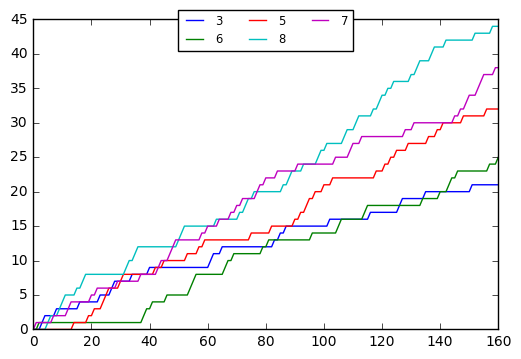

In [6]:
from matplotlib.font_manager import FontProperties

fontP = FontProperties()
fontP.set_size('small')

line_1, = plt.plot(options[0], label='3')
line_2, = plt.plot(options[1], label='6')
line_3, = plt.plot(options[2], label='5')
line_4, = plt.plot(options[3], label='8')
line_5, = plt.plot(options[4], label='7')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3,  handles=[line_1, line_2, line_3, line_4, line_5], prop = fontP)
